<a href="https://colab.research.google.com/github/cecilylynn/TooHotToHandleS05-DataProjects/blob/main/Data_Exploration_and_Visualization_of_THTHS05_Follower_Counts_24_Hours_After_Drop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the [THTH Data Collection Notebook](https://github.com/cecilylynn/TooHotToHandleS05-DataProjects/blob/main/Data_Collection_THTHS05.ipynb), I gathered the Instagram follower counts for each contestant and the @TooHotNetflix account each hour from 2am EST the day that episodes 1-4 were dropped until 2am the following day. This data was arranged as a pandas data frame where the time column gives the number of hours since the initial reading and each additional column contains the hourly follower counts of the specified account. This was exported as a CSV which we will now read in for analysis.

##Setting Up

In [2]:
#my usual data science toolbox
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#let's read in our data:
from google.colab import drive
drive.mount('/content/drive')

# Read in the csv file
first24_df = pd.read_csv('/content/drive/My Drive/Python/THTH Season 5/follower_counts_first_24_hours.csv')

#and copy our palette from the other notebook to use in our visualizations, set it as our seaborn palette
thth_palette = {'magenta': '#fb04cb', 'green': '#89ef1c', 'purple':'#9412f2', 'aqua': '#04fbfb', 'blue': '#5101f8', 'white': '#FFFFFF', 'yellow': '#fffe20','magenta': '#fb04cb', 'green': '#89ef1c', 'purple':'#9412f2', 'aqua': '#04fbfb', 'blue': '#5101f8', 'white': '#FFFFFF', 'yellow': '#fffe20'}
sns.set_palette(thth_palette)

Mounted at /content/drive


In [4]:
#use Time as the index
first24_df.set_index('Time', inplace = True)

first24_df.head()

,Dre,Isaac,Alex,Christine,Courtney,Elys,Hannah,Hunter,Louis,Megan,Too Hot
Time,,,,,,,,,,,
0,4473,25470,18376,34455,111090,19631,302740,19204,62520,15459,654723
1,4475,25471,18379,34457,111100,19633,302737,19205,62527,15462,654734
2,4491,25502,18391,34481,111125,19680,302781,19211,62567,15495,654671
3,4516,25551,18411,34528,111162,19761,302832,19222,62651,15540,654650
4,4529,25607,18422,34582,111193,19867,302899,19229,62765,15586,654644


##Charting Number of Follwers Hourly

Now let's do some basic exploration to get a feel for this data. To get started, let's just visualize the changes all the accounts.

<Axes: xlabel='Time'>

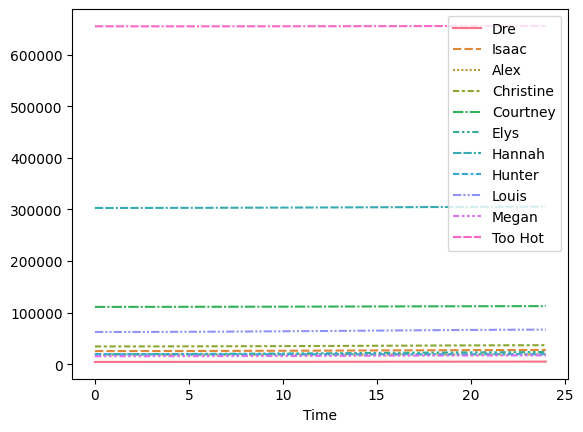

In [5]:
sns.lineplot(data=first24_df)

This visulization doesn't help much since Hannah and @tooHotNetflix have so many more followers than the others. Let's take them out to see if we can get a better look.

<Axes: xlabel='Time'>

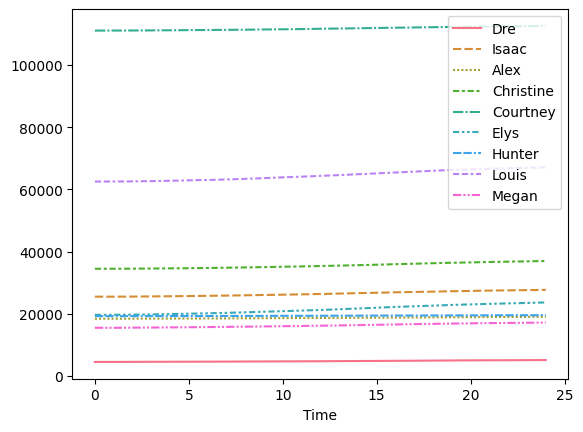

In [6]:
sns.lineplot(data=first24_df[[name for name in first24_df.columns if ((name != 'Hannah') and (name != 'Too Hot')) ]])

This is a little bit better. We can see that for the most part, popularity rankings as determined by number of Instagram followers are unchanged, but we notice that Elys started in the middle of the pack with Alex, Courtney, Hunter, Louis and Megan but ends up above all of them. Let's take a look at just her growth and zoom in on her growth compared to the others with similar initial follower counts:

<Axes: xlabel='Time', ylabel='Elys'>

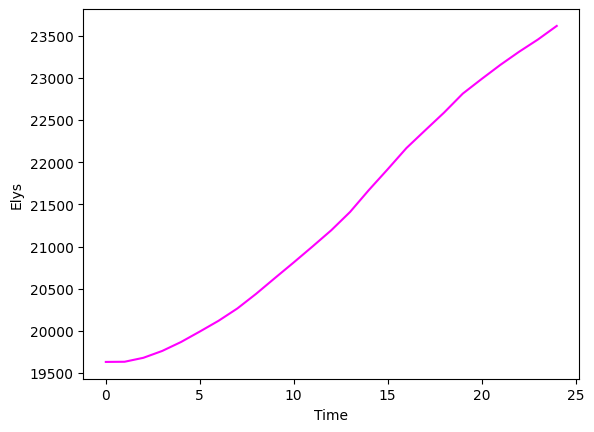

In [7]:
sns.lineplot(data=first24_df.Elys)

<Axes: xlabel='Time'>

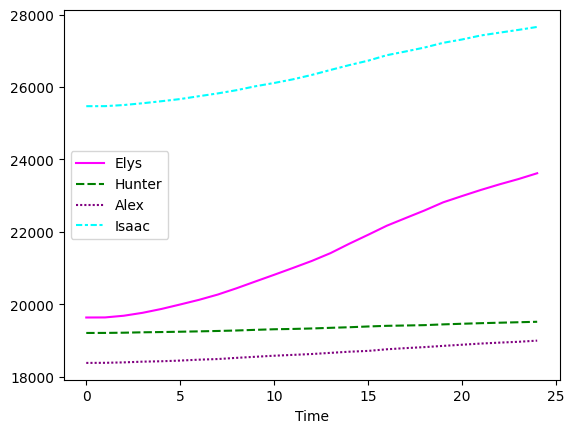

In [8]:
sns.lineplot(data=first24_df[['Elys', 'Hunter', 'Alex', 'Isaac']])

Wow! It's clear that Elys had a much faster rate of growth than the others. We'll pay special attention to her throughout our analysis.

We also see Alex catching up significantly to Hunter, while Hunter's follower count remains steady. Let's pay attention to these two as well.

Now let's take a closer look at some of the least popular contestants who started with similar numbers of followers

<Axes: xlabel='Time'>

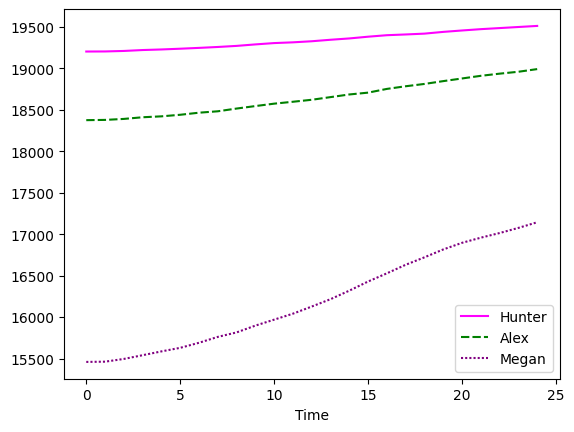

In [9]:
sns.lineplot(data=first24_df[['Hunter', 'Alex', 'Megan']])

It looks like Megan has the quickest growth, but nothing too exciting is happening here.

## Investigating Overall Raw Change and Percent Change

We'll look at the raw change and the percent change for each. To do this, we'll construct a data frame using list comprehension.

In [10]:
changes_df = pd.DataFrame({'Name': [name for name in first24_df.columns],
                           'init_count' : [(first24_df[name][0]) for name in first24_df.columns],
                           'raw_change' : [(first24_df[name][24]-first24_df[name][0]) for name in first24_df.columns],
                           'percent_change': [round(100*((first24_df[name][24]-first24_df[name][0])/ first24_df[name][0]),2) for name in first24_df.columns]})

In [11]:
changes_df

,Name,init_count,raw_change,percent_change
0,Dre,4473,604,13.50
1,Isaac,25470,2190,8.60
2,Alex,18376,616,3.35
3,Christine,34455,2488,7.22
4,Courtney,111090,1506,1.36
5,Elys,19631,3986,20.30
6,Hannah,302740,2549,0.84
7,Hunter,19204,309,1.61
8,Louis,62520,4572,7.31
9,Megan,15459,1685,10.90


We know from our exploration in our [Data Exploration and Visualization of Baseline Follower Counts THTHS05 notebook](https://github.com/cecilylynn/TooHotToHandleS05-DataProjects/blob/main/Data_Exploration_and_Visualization_of_Baseline_Follower_Counts_THTHS05.ipynb) that Hannah, Courtney, and Louis had the most followers 24 hours before the show released. Will this have a relationship to their changes in follower counts?

Who had the largest gain in followers? Let's sort by raw change.

<Axes: xlabel='Name', ylabel='raw_change'>

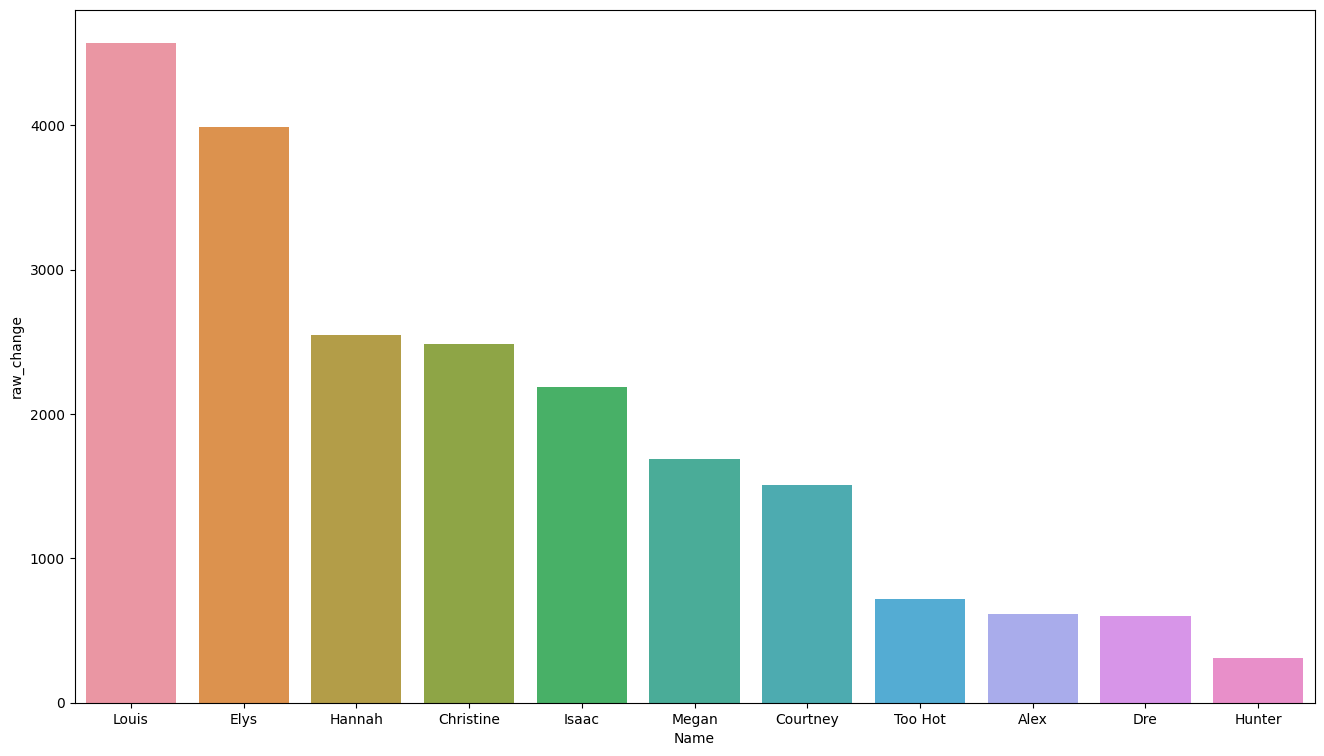

In [12]:
plt.figure(figsize=(16,9))

sns.barplot(changes_df[['Name','raw_change']].sort_values('raw_change', ascending = False), x= 'Name', y='raw_change')

In [13]:
changes_df[['Name','raw_change']].sort_values('raw_change', ascending = False).head(3)

,Name,raw_change
8,Louis,4572
5,Elys,3986
6,Hannah,2549


<Axes: xlabel='Name', ylabel='raw_change'>

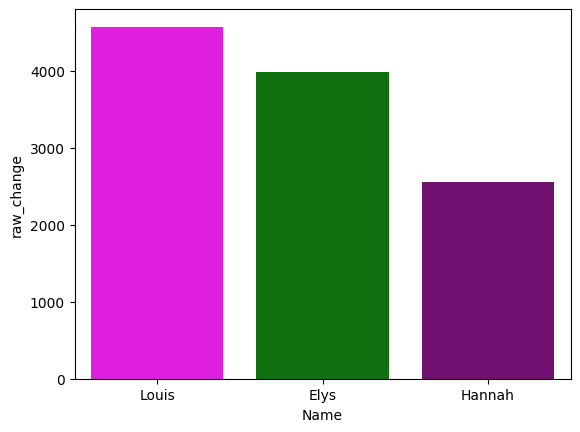

In [14]:
sns.barplot(changes_df[['Name','raw_change']].sort_values('raw_change', ascending = False).head(3), x= 'Name', y='raw_change')

The singles with the biggest net gain in followers are Louis (+4,572), Elys (+3,986), and Hannah (+2,549). Louis and Hannah were already popular, but Elys started in the middle of the pack, so it's interesting to see her rise up. This might warrant further investigation into her behavior on the show to see if there's a reason for her Instagram success.

In [15]:
changes_df[['Name','raw_change']].sort_values('raw_change', ascending = False).tail(3)

,Name,raw_change
2,Alex,616
0,Dre,604
7,Hunter,309


<Axes: xlabel='Name', ylabel='raw_change'>

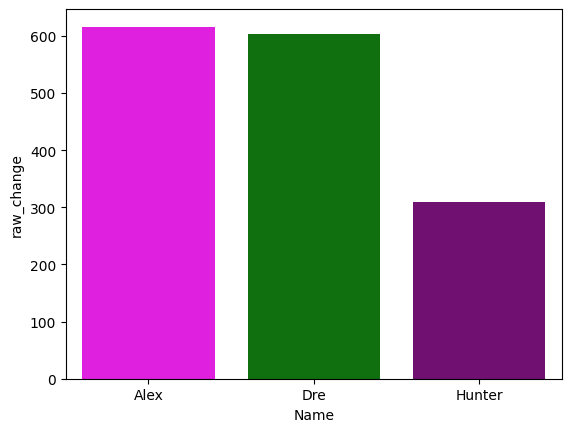

In [16]:
sns.barplot(changes_df[['Name','raw_change']].sort_values('raw_change', ascending = False).tail(3), x= 'Name', y='raw_change')

The singles with the smallest net gain at Alex (+616), Dre, (+604), and Hunter (+309). They had some of the lowest follower counts to begin with.

Now let's look at the percent change for each account.

<Axes: xlabel='Name', ylabel='percent_change'>

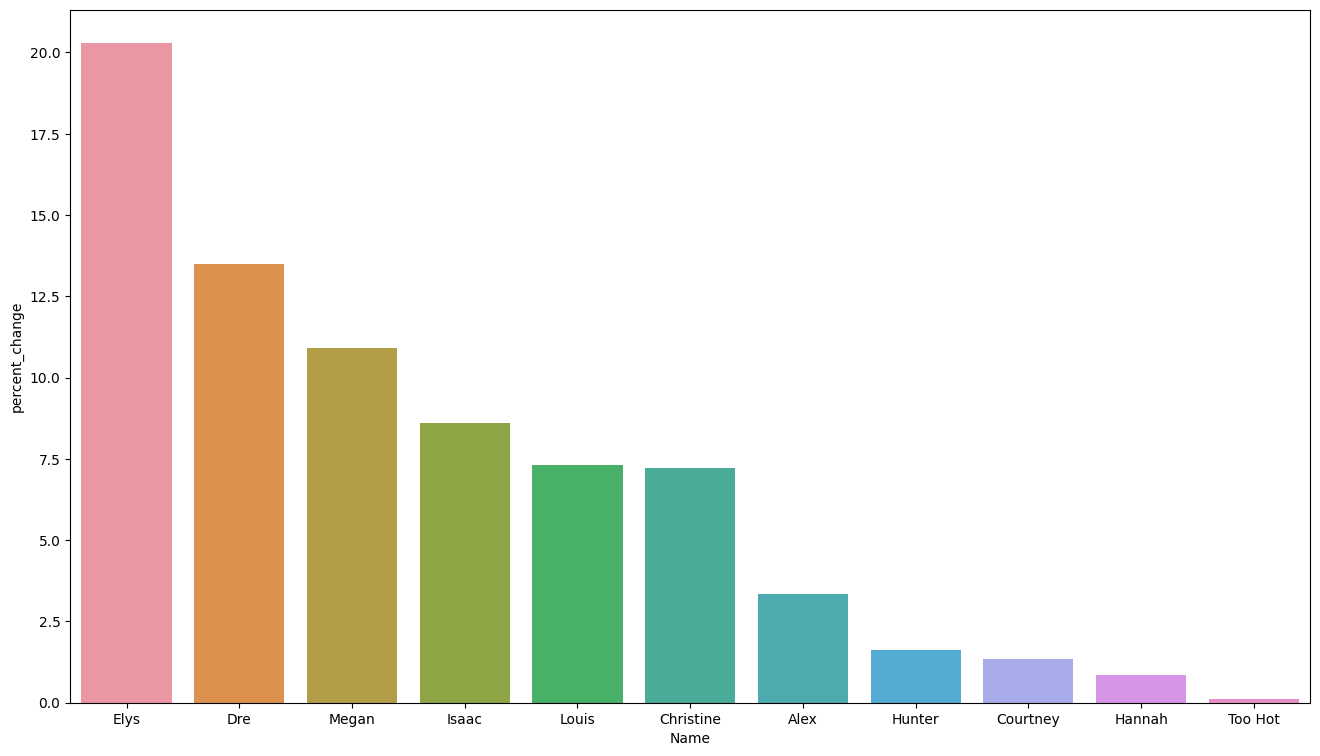

In [17]:


plt.figure(figsize=(16,9))

sns.barplot(changes_df[['Name','percent_change']].sort_values('percent_change', ascending = False), x= 'Name', y='percent_change')

In [18]:
changes_df[['Name','percent_change']].sort_values('percent_change', ascending = False).head(3)

,Name,percent_change
5,Elys,20.3
0,Dre,13.5
9,Megan,10.9


<Axes: xlabel='Name', ylabel='percent_change'>

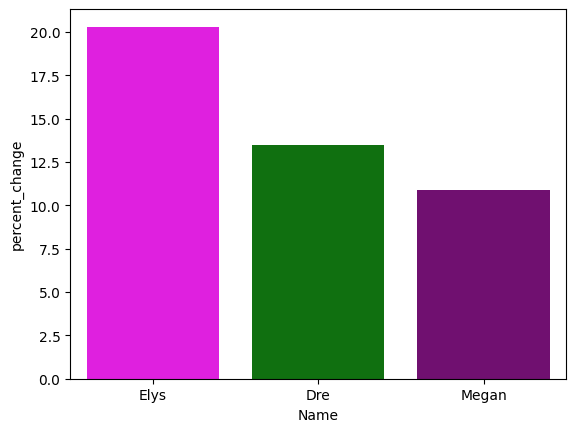

In [19]:
sns.barplot(changes_df[['Name','percent_change']].sort_values('percent_change', ascending = False).head(3), x= 'Name', y='percent_change')

The top three singles who showed the highest percent growth in followers are Elys (+20.3%), Dre (13.5%), and Megan (10.9%).

In [20]:
changes_df[['Name','percent_change']].sort_values('percent_change').head(4)

,Name,percent_change
10,Too Hot,0.11
6,Hannah,0.84
4,Courtney,1.36
7,Hunter,1.61


<Axes: xlabel='Name', ylabel='percent_change'>

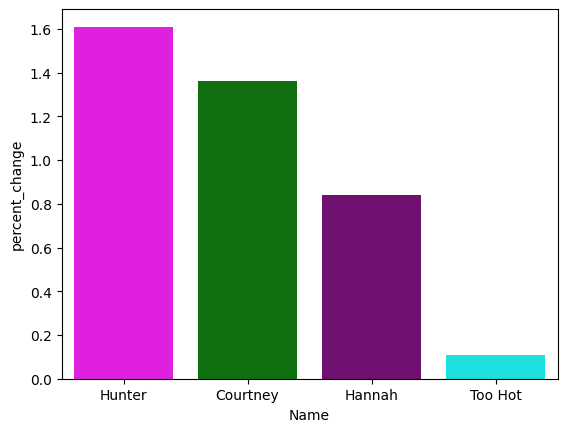

In [21]:
sns.barplot(changes_df[['Name','percent_change']].sort_values('percent_change', ascending = False).tail(4), x= 'Name', y='percent_change')

The @TooHotNetfix account saw the least percent growth.

The singles with the lowest percent growth are Hannah (+.84%), Courtney (+1.36%), and Hunter (+1.61%).



It's interesting that Hannah had the least percent growth since she started with the most followers, but this makes since since it would take more new followers for her to see the same growth as another contestant.

Similarly, it makes sense that Elys has the highest percent growth since she started with a lower follower count but had a significant net increase in followers. Notably, the other two contestants with the largest perecent growth were the two contestants with the fewest initial followers.

Let's take a look to see what the correlation between number of initial followers and percent growth is.

<Axes: xlabel='0', ylabel='percent_change'>

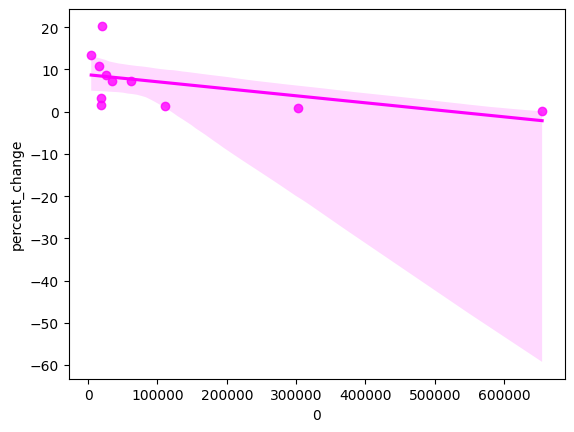

In [22]:
sns.regplot(x=first24_df.head(1), y=changes_df.percent_change)

<Axes: xlabel='0', ylabel='raw_change'>

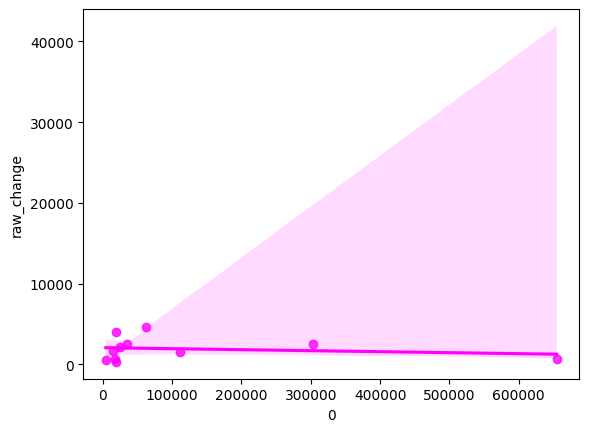

In [23]:
sns.regplot(x=first24_df.head(1), y=changes_df.raw_change)

We see a slight negative correllation between number of initial followers and both raw and percent increase.

## Feature Engineering

To get a better understanding of our data, let's create some new features. We want to look at raw change per hour and percent change per hour for each account. We'll make a new dataframes with this hourly information and then plot it.

In [24]:
hourly_raw_change_df = pd.DataFrame({name: [first24_df[name][i+1]-first24_df[name][i] for i in range(24)] for name in first24_df.columns})

Text(0, 0.5, 'Number of New Instagram Followers')

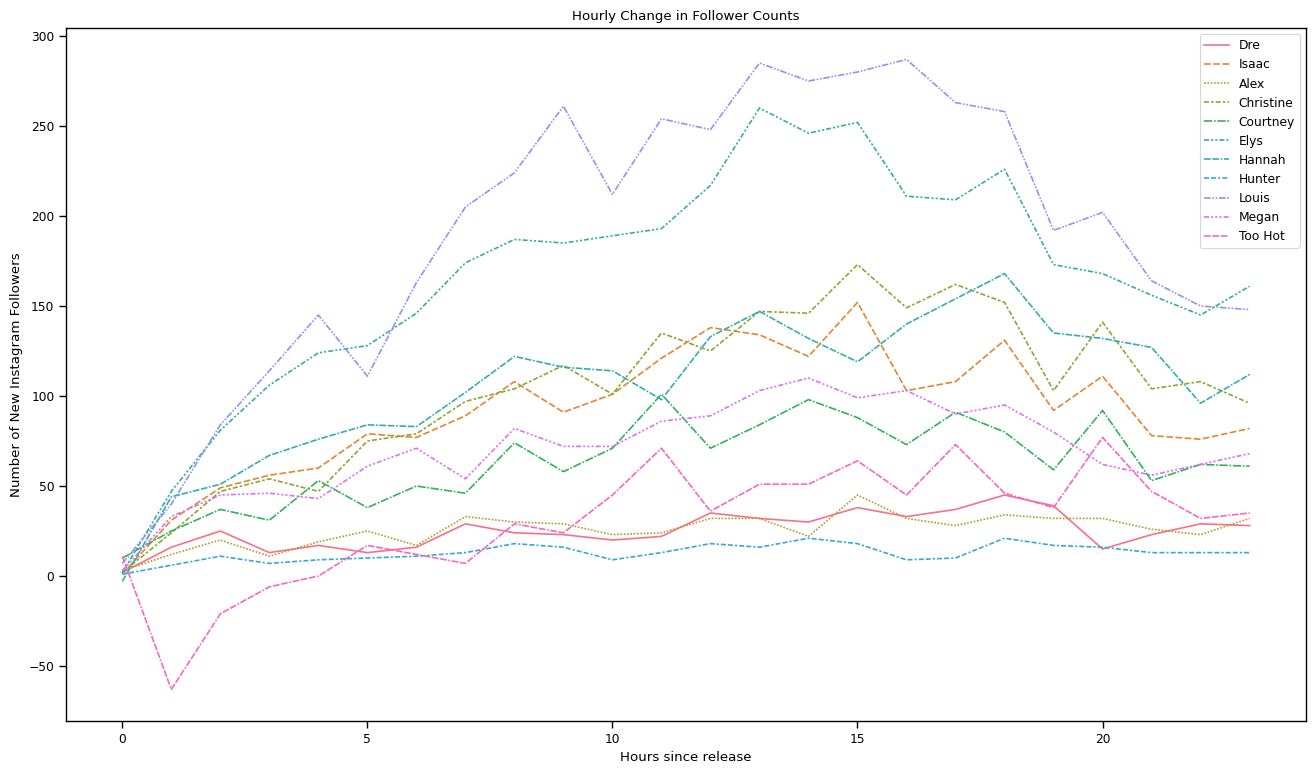

In [45]:
plt.figure(figsize=(16,9))
sns.set_context("paper")
ax = sns.lineplot(data=hourly_raw_change_df)
plt.title("Hourly Change in Follower Counts")
ax.set_xlabel("Hours since release")
ax.set_ylabel("Number of New Instagram Followers")

We can make a few initial observations:

The official Netflix THTH Instagram lost followers initially.

Louis and Elys consistently had the most gains per hour, roughly tracking together. This is interesting since they were not involved with each other, but each was in the middle of a love triangle. This suggests that being the focus of a love triangle leads to more gains in followers.

Hunter has the lowest gains in followers, despite being involved in the love triangle with Elys. This suggests that being in a love triangle but not the hinge of the triangle doesn't do much to endear viewers to you and doesn't convert viewers into followers.

Hannah, who entered the show with the most followers, blends in with the pack in terms of raw gains. This suggests that the number of followers one has to begin with doesn't affect how many viewers of the show will be converted into new followers.



We also want to normalize the data by looking at hourly percent gains instead of net gains.

In [26]:
hourly_percent_change_df = pd.DataFrame({name: [round(100*(first24_df[name][i+1]-first24_df[name][i])/first24_df[name][i], 2) for i in range(24)] for name in first24_df.columns})


Text(0, 0.5, 'Percent Growth in Instagram Followers')

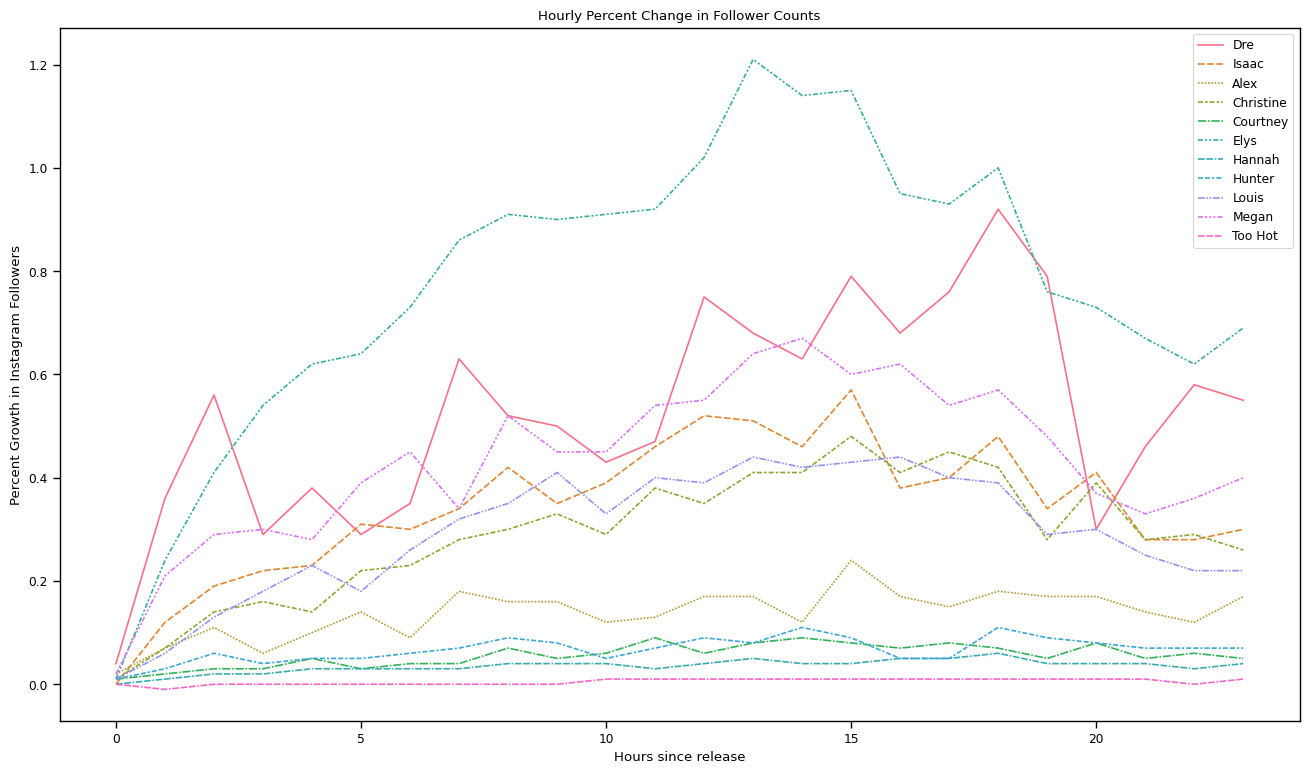

In [48]:
plt.figure(figsize=(16,9))
sns.set_context("paper")
ax = sns.lineplot(data=hourly_percent_change_df)
plt.title("Hourly Percent Change in Follower Counts")
ax.set_xlabel("Hours since release")
ax.set_ylabel("Percent Growth in Instagram Followers")


Again, we see Elys at the top of the pack, but Louis blends into the middle again. Dre, who had unremarkable net gains, now rises towards the top just behind Elys in terms of percent growth. Notably, Elys and Dre had almost opposite behavior onscreen, as Elys was a repeat rule breaker and in a love triangle while Dre was the self-appointed "Sheriff" and had no romantic or sexual connections.

This emphasizes that the fewer followers a contestant started with, the more impactful their gain in followers will be. In particular, this suggests that someone who is just starting to gain a following on Instagram would benefit more in terms of percent growth by appearing on a reality show than someone who already has a large established following, regardless of their on-screen behavior. In particular, I would recommend a micro-influencer participate in a realtiy dating show, but a more established influencer can probably find better ways to increase their following.

## Examining Affects of On-Screen Connections


An aspiring influencer who's decided to join the cast of a reality dating show might wonder how they should act and who they should hook up with on-screen in order to maximize their Instagram follower growth. This section will delve into the changes in follower counts based on the on-screen behavior in episodes 1-4 of the ten original contestants.

### Love Triangle: Elys, Alex, and Hunter

Elys is the focal point of this triangle

What are their initial follower counts?



In [33]:
eah_changes_df=changes_df.loc[changes_df.Name.isin(['Elys', 'Alex', 'Hunter'])]

eah_changes_df

,Name,init_count,raw_change,percent_change
2,Alex,18376,616,3.35
5,Elys,19631,3986,20.30
7,Hunter,19204,309,1.61


Text(0, 0.5, 'Number of Followers')

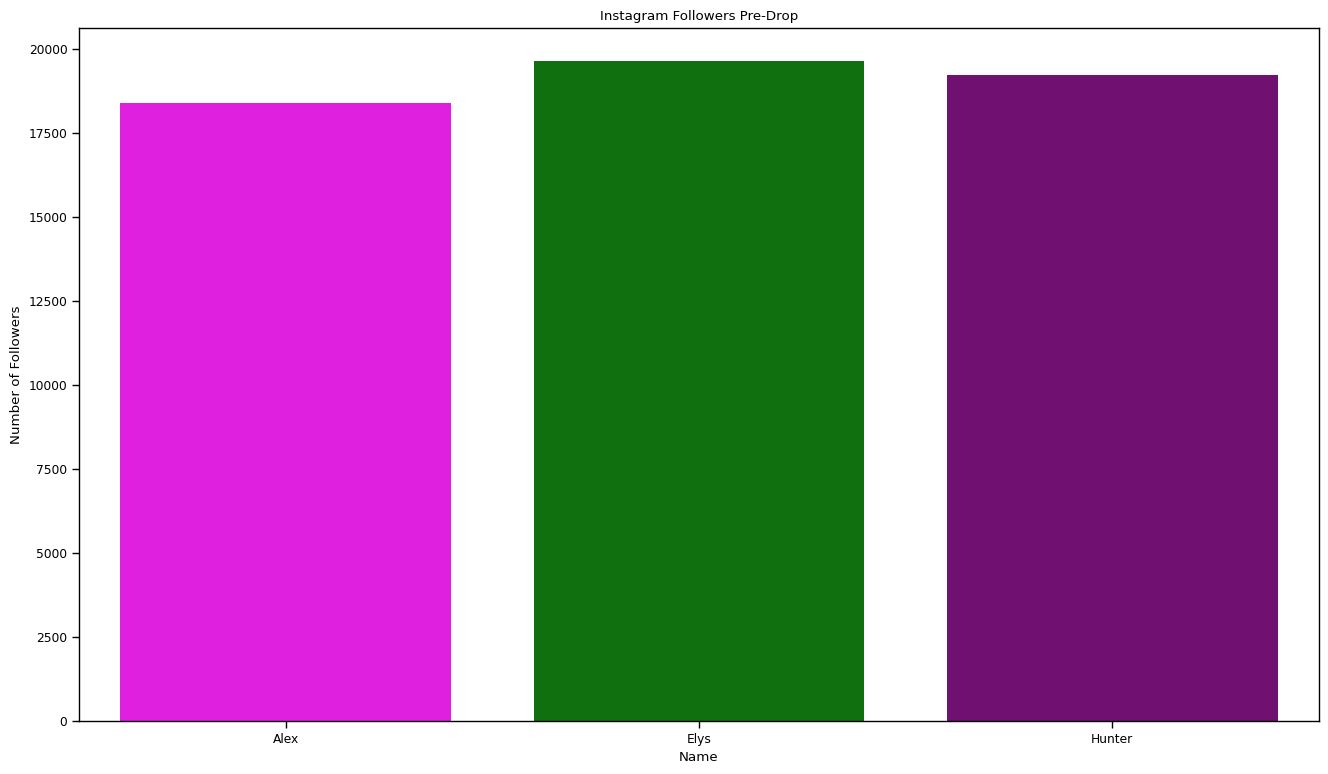

In [58]:

plt.figure(figsize=(16,9))
sns.set_context("paper")
ax = sns.barplot(data=eah_changes_df, y='init_count', x='Name')
plt.title("Instagram Followers Pre-Drop")
ax.set_xlabel("Name")
ax.set_ylabel("Number of Followers")


We can see that Alex, Elys, and Hunter had a similar number of followers to begin with. This means that their raw change and percent change graphs will look very similar, so we'll just look at the percent change.

Text(0, 0.5, 'Percent Change in Followers')

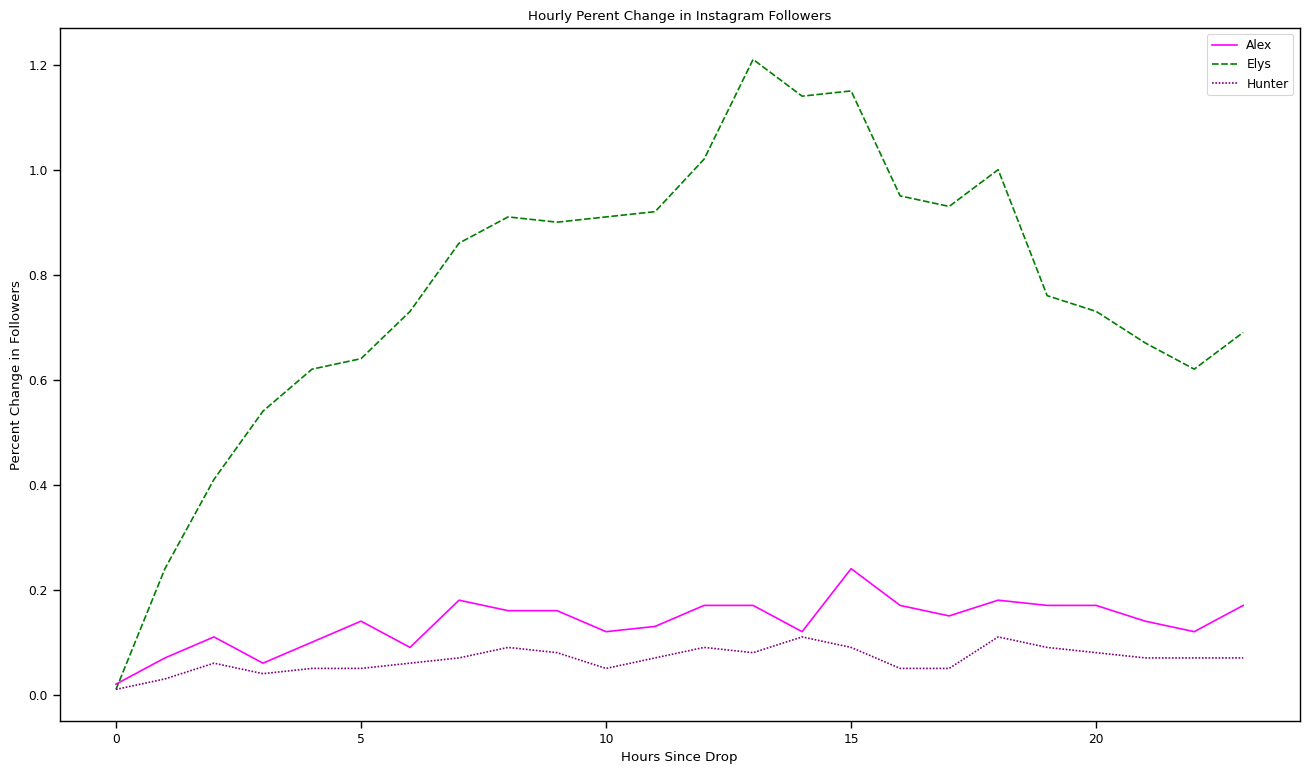

In [59]:


plt.figure(figsize=(16,9))
sns.set_context("paper")
ax = sns.lineplot(data=hourly_percent_change_df[['Alex','Elys','Hunter']])

plt.title("Hourly Percent Change in Instagram Followers")
ax.set_xlabel("Hours Since Drop")
ax.set_ylabel("Percent Change in Followers")

Here we see that Elys far outpaces the boys, who show only modest growth. This supports the hypothesis that being the hinge in the triangle leads to more follower growth than another role.

### Love Triangle: Louis, Hannah, and Christine

Louis is the focal point of this triangle.

What are their initial follower counts?



In [60]:
lhc_changes_df=changes_df.loc[changes_df.Name.isin(['Louis', 'Hannah', 'Christine'])]

lhc_changes_df

,Name,init_count,raw_change,percent_change
3,Christine,34455,2488,7.22
6,Hannah,302740,2549,0.84
8,Louis,62520,4572,7.31


Text(0, 0.5, 'Number of Followers')

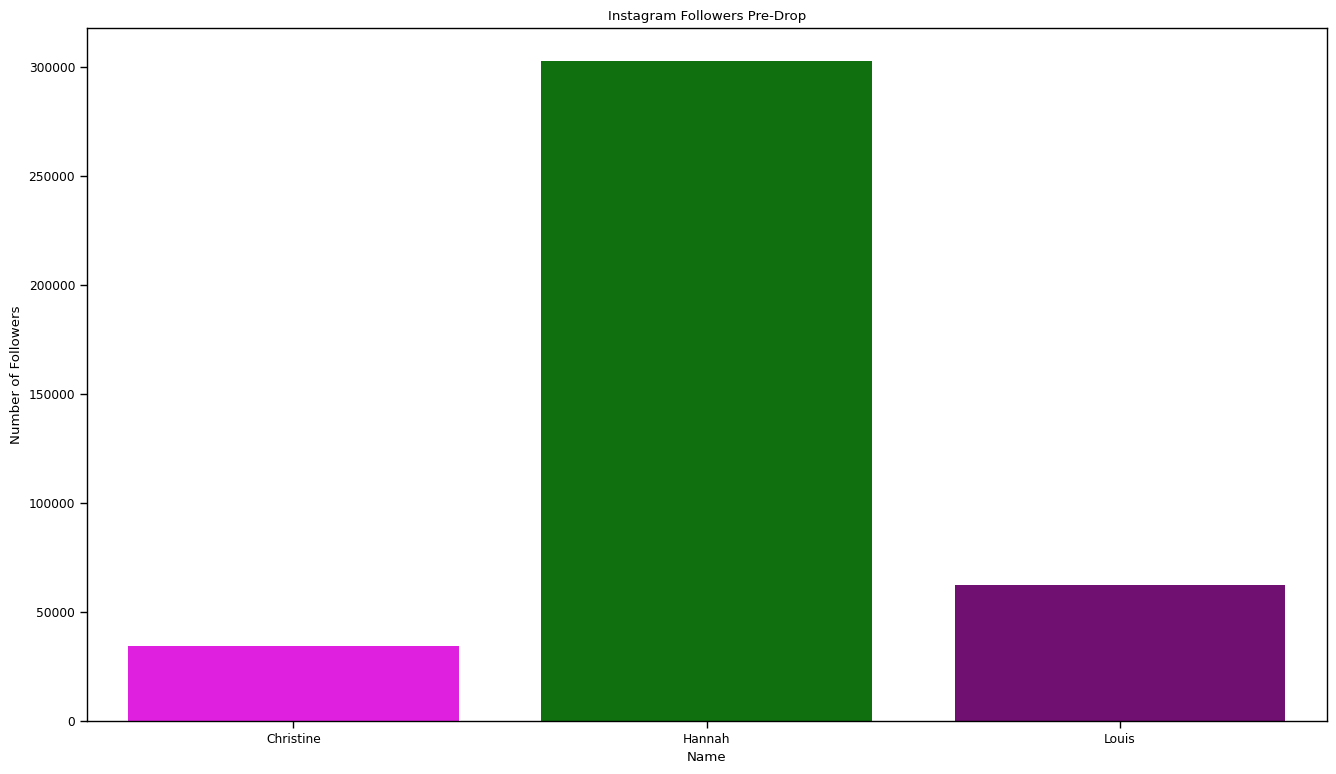

In [61]:

plt.figure(figsize=(16,9))
sns.set_context("paper")
ax = sns.barplot(data=lhc_changes_df, y='init_count', x='Name')
plt.title("Instagram Followers Pre-Drop")
ax.set_xlabel("Name")
ax.set_ylabel("Number of Followers")


We can see that Hannah came in with far more followers than Louis and Christine. So in this case, we want to look at net follower gains as well as percent, since they might give us different insights.

Let's first look at net changes.

Text(0, 0.5, 'Number of New Followers')

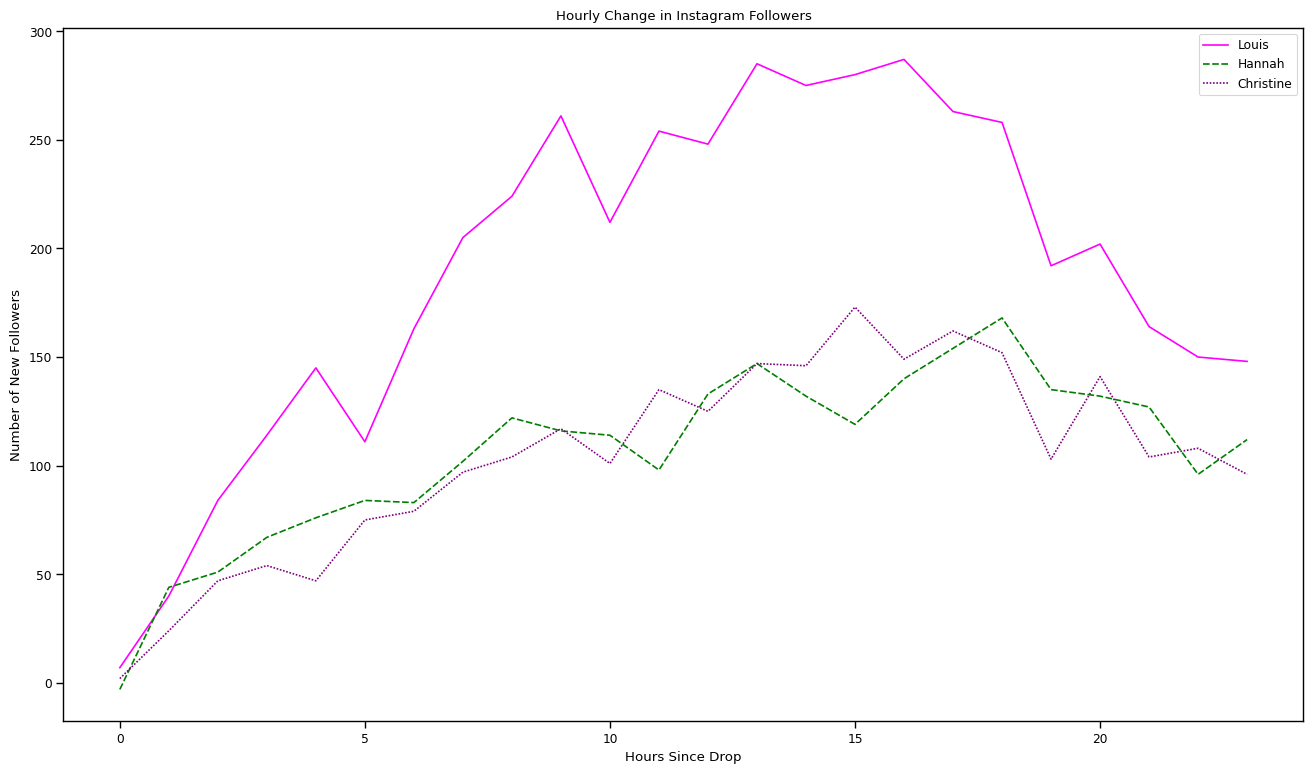

In [63]:
plt.figure(figsize=(16,9))
sns.set_context("paper")
ax = sns.lineplot(data=hourly_raw_change_df[['Louis','Hannah','Christine']])

plt.title("Hourly Change in Instagram Followers")
ax.set_xlabel("Hours Since Drop")
ax.set_ylabel("Number of New Followers")

Again, as in the Elys, Alex, Hunter case, we see that the focus of the triangle gains the most new followers. Again, the other two singles see their number move together. This adds more support to the hypothesis that being the focal point of a triangle is the best position for follower growth.


However, we see a lot more growth for Hannah and Christine than we saw for Alex and Hunter. This might suggest that the sex of the contestant affects how their actions are received by viewers, or perhaps just that the sex of the contestant affects how many new followers a constestant gains.

Text(0, 0.5, 'Percent Change in Followers')

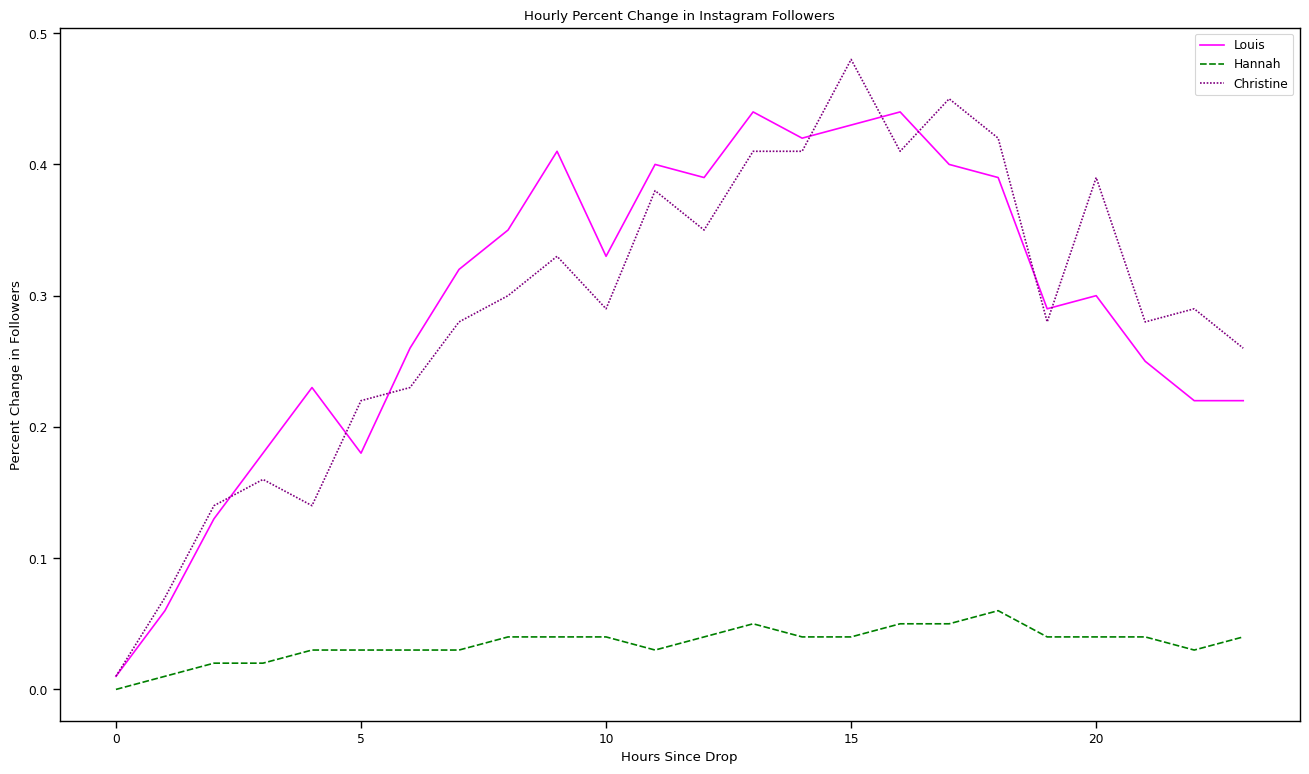

In [62]:
plt.figure(figsize=(16,9))
sns.set_context("paper")
ax = sns.lineplot(data=hourly_percent_change_df[['Louis','Hannah','Christine']])

plt.title("Hourly Percent Change in Instagram Followers")
ax.set_xlabel("Hours Since Drop")
ax.set_ylabel("Percent Change in Followers")

Wow! This looks a lot different than the graph for Elys, Alex, and Hunter. There, Elys stood head and shoulders above the others. Here, though, Louis and Christine really move together, while Hannah lags behind. This again emphasizes that participating in a show like THTH will have a smaller percent gain on followers for someone who already has an established following.

#Recommendations

Going on a reality dating show can help you grow your following, and is most impactful for those who are trying to get established, but not going to make that big of a difference for influencer who already have a significant following.

If you're on a reality dating show to increase your follower count, try to maneuver yourself to be a hinge in a love triangle.

#Further Questions

How does gender affect gains in followers?

How do rule breaks affect gains in followers?

How does screen time affect gains in followers?